### 1. Import Libraries


In [55]:

import numpy as np
import pandas as pd
from utils import display_data_model, save_to_csv,create_database, get_engine, create_tables,load_data_from_df

### Extraction layer


In [56]:
ecommerce_df = pd.read_csv('dataset/raw_data/yanki_ecommerce.csv')

ecommerce_df

,Order_ID,Customer_ID,Customer_Name,Product_ID,Product_Name,Brand,Category,Price,Quantity,Total_Price,Order_Date,Shipping_Address,City,State,Country,Postal_Code,Email,Phone_Number,Payment_Method,Transaction_Status
0,NaN,NaN,NaN,64b689a8-bf03-47d2-a5cc-0723baeb1606,major,Haynes PLC,perfume,52.34,2,104.68,27/05/2020 14:20,"1648 Brown Bridge Apt. 846\nCaitlinland, MI 57992",Davidstad,Utah,China,50247,karen64@example.com,001-217-511-0290x8262,Credit Card,completed
1,NaN,NaN,NaN,64b689a8-bf03-47d2-a5cc-0723baeb1606,major,Haynes PLC,perfume,52.34,2,104.68,27/05/2020 14:20,"1648 Brown Bridge Apt. 846\nCaitlinland, MI 57992",Davidstad,Utah,China,50247,karen64@example.com,001-217-511-0290x8262,Credit Card,completed
2,e32af09a-b6ab-497e-af3a-331e4d4ed6e7,e0d6cb3c-c4b0-4cfe-8225-b65d094d2424,Dominic Buchanan,2ef6e8fa-6a36-4515-b1c2-a0a700abf386,despite,"Lawson, Stone and Campos",perfume oil,250.57,2,501.14,06/03/2020 06:49,"PSC 2224, Box 2284\nAPO AP 65880",Jordanborough,Arkansas,Kuwait,27879,margaret97@example.com,259.603.6134,Debit Card,completed
3,86eb8859-14ab-4d4e-9267-c5826f4e0c8e,fa3ca35a-5540-404b-a7eb-9001cdcbd840,Daniel Allen,3ba38e01-f8e7-4af2-9246-87ef0961d4f5,sea,Washington Group,perfume oil,179.81,6,1078.86,31/07/2020 07:09,"83909 Johnson Mall\nTranberg, MS 99017",Lake Ginatown,Georgia,Saint Vincent and the Grenadines,39336,angela55@example.com,+1-869-659-4272x982,Credit Card,completed
4,7379b560-8897-4623-92a2-523ddcdc43a1,7ad4de53-e6d7-4cd3-99b8-13fb70fe7a34,Daniel Schmidt,a58c53bd-a34b-4541-b926-bec9eb84cac2,suddenly,Rodgers Ltd,perfume oil,600.55,7,4203.85,11/05/2021 04:33,"82101 Johnson Flat\nWest Ryan, MS 29075",Sarahville,Ohio,France,30845,wayne59@example.org,292.840.0975x724,PayPal,pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,bb17468a-7648-4974-b3d6-9f9f1a78cb39,1e75eb3a-9ba5-4ea6-82ec-886abe298058,Jeremy Farrell,ad5204d7-e5c2-417c-91f7-5fa07619ef54,officer,Thornton Group,perfume,118.46,3,355.38,07/08/2023 12:34,"440 Carson Port Suite 634\nLake Heather, MA 22883",West Danielle,South Carolina,Iran,17863,leejohn@example.com,922.207.8157x85481,PayPal,pending
1016,184827be-c3bd-40a1-a2bb-8b085d58ddc0,c53c32ef-2e64-4ac4-ac48-3707ab1ebd1f,Marc Hudson,0ea15074-b823-4345-924c-aeb9fafe9571,treat,Guzman-Petersen,perfume,91.14,2,182.28,14/01/2024 09:27,"75333 Clayton Forges Apt. 292\nLake Matthew, D...",Whitemouth,Arkansas,Japan,24756,james85@example.org,908.901.4896x12666,PayPal,completed
1017,2dac83f2-fddb-4761-b211-ea716feee91c,ebc19a03-a32d-4d3c-9976-f30cee3d3a70,Devin Joseph,e911b0a9-75fb-4c17-b552-52be0d19f856,watch,Jones-May,perfume,246.73,10,2467.30,23/01/2021 10:25,"426 Amy Islands\nCollinsberg, MT 21928",South Stephanie,Indiana,Timor-Leste,54502,chadbenson@example.com,(718)789-6289,PayPal,pending
1018,08341169-2d82-41d4-8273-fda624f99042,0598403f-7a42-44a9-994e-9f23feb20394,Spencer Elliott,9c9792f9-4dc2-43b2-98f4-e989cf1bdb3a,toward,Richardson PLC,perfume,647.26,10,6472.60,15/04/2022 23:15,"01490 Lopez Garden\nPort Adamton, ND 35200",Thompsonfort,South Dakota,Pakistan,78892,eric98@example.org,366-506-0469x728,PayPal,pending


In [57]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_ID            1000 non-null   object 
 1   Customer_ID         1000 non-null   object 
 2   Customer_Name       1000 non-null   object 
 3   Product_ID          1020 non-null   object 
 4   Product_Name        1020 non-null   object 
 5   Brand               1020 non-null   object 
 6   Category            1020 non-null   object 
 7   Price               1020 non-null   float64
 8   Quantity            1020 non-null   int64  
 9   Total_Price         1020 non-null   float64
 10  Order_Date          1020 non-null   object 
 11  Shipping_Address    1020 non-null   object 
 12  City                1020 non-null   object 
 13  State               1019 non-null   object 
 14  Country             1020 non-null   object 
 15  Postal_Code         1020 non-null   int64  
 16  Email 

In [58]:
ecommerce_df.head()

,Order_ID,Customer_ID,Customer_Name,Product_ID,Product_Name,Brand,Category,Price,Quantity,Total_Price,Order_Date,Shipping_Address,City,State,Country,Postal_Code,Email,Phone_Number,Payment_Method,Transaction_Status
0,NaN,NaN,NaN,64b689a8-bf03-47d2-a5cc-0723baeb1606,major,Haynes PLC,perfume,52.34,2,104.68,27/05/2020 14:20,"1648 Brown Bridge Apt. 846\nCaitlinland, MI 57992",Davidstad,Utah,China,50247,karen64@example.com,001-217-511-0290x8262,Credit Card,completed
1,NaN,NaN,NaN,64b689a8-bf03-47d2-a5cc-0723baeb1606,major,Haynes PLC,perfume,52.34,2,104.68,27/05/2020 14:20,"1648 Brown Bridge Apt. 846\nCaitlinland, MI 57992",Davidstad,Utah,China,50247,karen64@example.com,001-217-511-0290x8262,Credit Card,completed
2,e32af09a-b6ab-497e-af3a-331e4d4ed6e7,e0d6cb3c-c4b0-4cfe-8225-b65d094d2424,Dominic Buchanan,2ef6e8fa-6a36-4515-b1c2-a0a700abf386,despite,"Lawson, Stone and Campos",perfume oil,250.57,2,501.14,06/03/2020 06:49,"PSC 2224, Box 2284\nAPO AP 65880",Jordanborough,Arkansas,Kuwait,27879,margaret97@example.com,259.603.6134,Debit Card,completed
3,86eb8859-14ab-4d4e-9267-c5826f4e0c8e,fa3ca35a-5540-404b-a7eb-9001cdcbd840,Daniel Allen,3ba38e01-f8e7-4af2-9246-87ef0961d4f5,sea,Washington Group,perfume oil,179.81,6,1078.86,31/07/2020 07:09,"83909 Johnson Mall\nTranberg, MS 99017",Lake Ginatown,Georgia,Saint Vincent and the Grenadines,39336,angela55@example.com,+1-869-659-4272x982,Credit Card,completed
4,7379b560-8897-4623-92a2-523ddcdc43a1,7ad4de53-e6d7-4cd3-99b8-13fb70fe7a34,Daniel Schmidt,a58c53bd-a34b-4541-b926-bec9eb84cac2,suddenly,Rodgers Ltd,perfume oil,600.55,7,4203.85,11/05/2021 04:33,"82101 Johnson Flat\nWest Ryan, MS 29075",Sarahville,Ohio,France,30845,wayne59@example.org,292.840.0975x724,PayPal,pending


In [59]:
ecommerce_df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Name', 'Product_ID',
       'Product_Name', 'Brand', 'Category', 'Price', 'Quantity', 'Total_Price',
       'Order_Date', 'Shipping_Address', 'City', 'State', 'Country',
       'Postal_Code', 'Email', 'Phone_Number', 'Payment_Method',
       'Transaction_Status'],
      dtype='object')

### DATA CLEANING AND TRANSFORMATION

In [60]:
# drop missing value
ecommerce_df.dropna(subset=['Order_ID','Customer_ID'], inplace=True)

In [61]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2 to 1019
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_ID            1000 non-null   object 
 1   Customer_ID         1000 non-null   object 
 2   Customer_Name       1000 non-null   object 
 3   Product_ID          1000 non-null   object 
 4   Product_Name        1000 non-null   object 
 5   Brand               1000 non-null   object 
 6   Category            1000 non-null   object 
 7   Price               1000 non-null   float64
 8   Quantity            1000 non-null   int64  
 9   Total_Price         1000 non-null   float64
 10  Order_Date          1000 non-null   object 
 11  Shipping_Address    1000 non-null   object 
 12  City                1000 non-null   object 
 13  State               999 non-null    object 
 14  Country             1000 non-null   object 
 15  Postal_Code         1000 non-null   int64  
 16  Email      

In [62]:
# Convert order date from string  to datetime
ecommerce_df['Order_Date'] = pd.to_datetime(ecommerce_df['Order_Date'], dayfirst=True)

ecommerce_df

,Order_ID,Customer_ID,Customer_Name,Product_ID,Product_Name,Brand,Category,Price,Quantity,Total_Price,Order_Date,Shipping_Address,City,State,Country,Postal_Code,Email,Phone_Number,Payment_Method,Transaction_Status
2,e32af09a-b6ab-497e-af3a-331e4d4ed6e7,e0d6cb3c-c4b0-4cfe-8225-b65d094d2424,Dominic Buchanan,2ef6e8fa-6a36-4515-b1c2-a0a700abf386,despite,"Lawson, Stone and Campos",perfume oil,250.57,2,501.14,2020-03-06 06:49:00,"PSC 2224, Box 2284\nAPO AP 65880",Jordanborough,Arkansas,Kuwait,27879,margaret97@example.com,259.603.6134,Debit Card,completed
3,86eb8859-14ab-4d4e-9267-c5826f4e0c8e,fa3ca35a-5540-404b-a7eb-9001cdcbd840,Daniel Allen,3ba38e01-f8e7-4af2-9246-87ef0961d4f5,sea,Washington Group,perfume oil,179.81,6,1078.86,2020-07-31 07:09:00,"83909 Johnson Mall\nTranberg, MS 99017",Lake Ginatown,Georgia,Saint Vincent and the Grenadines,39336,angela55@example.com,+1-869-659-4272x982,Credit Card,completed
4,7379b560-8897-4623-92a2-523ddcdc43a1,7ad4de53-e6d7-4cd3-99b8-13fb70fe7a34,Daniel Schmidt,a58c53bd-a34b-4541-b926-bec9eb84cac2,suddenly,Rodgers Ltd,perfume oil,600.55,7,4203.85,2021-05-11 04:33:00,"82101 Johnson Flat\nWest Ryan, MS 29075",Sarahville,Ohio,France,30845,wayne59@example.org,292.840.0975x724,PayPal,pending
5,30c57f86-2fed-43c0-a399-654c2c3bb18d,4b9b409c-19f2-41c0-bc7c-6556e0647ebb,John Gonzalez,e6021be5-90be-4199-b6c6-82542fb2973c,site,"Wilson, Scott and Johnson",perfume oil,414.36,9,3729.24,2023-09-12 01:47:00,"4542 Gary Lane\nSouth Alexander, VI 27671",Lake Michelle,Arkansas,Sao Tome and Principe,30955,qsherman@example.com,+1-643-561-3912x262,PayPal,completed
6,41c29d81-9622-43c1-b537-7cdb320d3e6a,81b513ad-5c02-48cf-bff0-39e1440c4d22,Amber Benitez,60127671-ab32-4fb5-bfeb-1a7782ad835e,act,"Riddle, Alvarez and Robinson",perfume,704.05,9,6336.45,2021-08-20 18:02:00,"6794 Caroline Crescent\nEast Karlside, GU 81379",Olsenville,Mississippi,Croatia,45429,derek85@example.com,3424148376,PayPal,pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,bb17468a-7648-4974-b3d6-9f9f1a78cb39,1e75eb3a-9ba5-4ea6-82ec-886abe298058,Jeremy Farrell,ad5204d7-e5c2-417c-91f7-5fa07619ef54,officer,Thornton Group,perfume,118.46,3,355.38,2023-08-07 12:34:00,"440 Carson Port Suite 634\nLake Heather, MA 22883",West Danielle,South Carolina,Iran,17863,leejohn@example.com,922.207.8157x85481,PayPal,pending
1016,184827be-c3bd-40a1-a2bb-8b085d58ddc0,c53c32ef-2e64-4ac4-ac48-3707ab1ebd1f,Marc Hudson,0ea15074-b823-4345-924c-aeb9fafe9571,treat,Guzman-Petersen,perfume,91.14,2,182.28,2024-01-14 09:27:00,"75333 Clayton Forges Apt. 292\nLake Matthew, D...",Whitemouth,Arkansas,Japan,24756,james85@example.org,908.901.4896x12666,PayPal,completed
1017,2dac83f2-fddb-4761-b211-ea716feee91c,ebc19a03-a32d-4d3c-9976-f30cee3d3a70,Devin Joseph,e911b0a9-75fb-4c17-b552-52be0d19f856,watch,Jones-May,perfume,246.73,10,2467.30,2021-01-23 10:25:00,"426 Amy Islands\nCollinsberg, MT 21928",South Stephanie,Indiana,Timor-Leste,54502,chadbenson@example.com,(718)789-6289,PayPal,pending
1018,08341169-2d82-41d4-8273-fda624f99042,0598403f-7a42-44a9-994e-9f23feb20394,Spencer Elliott,9c9792f9-4dc2-43b2-98f4-e989cf1bdb3a,toward,Richardson PLC,perfume,647.26,10,6472.60,2022-04-15 23:15:00,"01490 Lopez Garden\nPort Adamton, ND 35200",Thompsonfort,South Dakota,Pakistan,78892,eric98@example.org,366-506-0469x728,PayPal,pending


In [63]:
ecommerce_df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Name', 'Product_ID',
       'Product_Name', 'Brand', 'Category', 'Price', 'Quantity', 'Total_Price',
       'Order_Date', 'Shipping_Address', 'City', 'State', 'Country',
       'Postal_Code', 'Email', 'Phone_Number', 'Payment_Method',
       'Transaction_Status'],
      dtype='object')

### Data Model

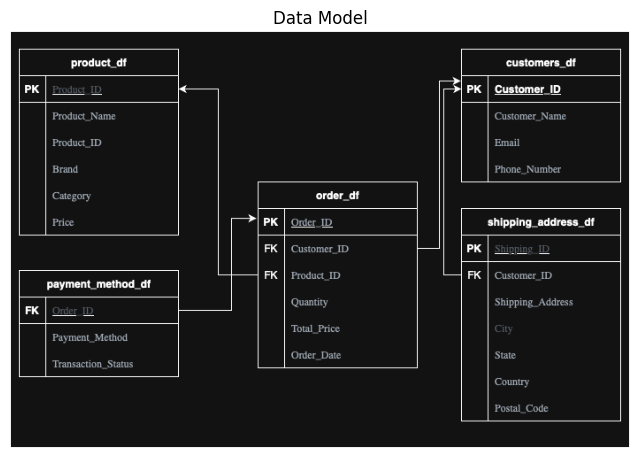

In [64]:
# Display Data Model for the ecommerce
display_data_model()

In [65]:
# Customer Table
customer_df = ecommerce_df[['Customer_ID','Customer_Name','Email', 'Phone_Number']].copy().drop_duplicates().reset_index(drop=True)
customer_df.head()


,Customer_ID,Customer_Name,Email,Phone_Number
0,e0d6cb3c-c4b0-4cfe-8225-b65d094d2424,Dominic Buchanan,margaret97@example.com,259.603.6134
1,fa3ca35a-5540-404b-a7eb-9001cdcbd840,Daniel Allen,angela55@example.com,+1-869-659-4272x982
2,7ad4de53-e6d7-4cd3-99b8-13fb70fe7a34,Daniel Schmidt,wayne59@example.org,292.840.0975x724
3,4b9b409c-19f2-41c0-bc7c-6556e0647ebb,John Gonzalez,qsherman@example.com,+1-643-561-3912x262
4,81b513ad-5c02-48cf-bff0-39e1440c4d22,Amber Benitez,derek85@example.com,3424148376


In [66]:
## Product Table
product_df = ecommerce_df[['Product_ID','Product_Name', 'Brand', 'Category', 'Price']].copy().drop_duplicates().reset_index(drop=True)
product_df.head()

,Product_ID,Product_Name,Brand,Category,Price
0,2ef6e8fa-6a36-4515-b1c2-a0a700abf386,despite,"Lawson, Stone and Campos",perfume oil,250.57
1,3ba38e01-f8e7-4af2-9246-87ef0961d4f5,sea,Washington Group,perfume oil,179.81
2,a58c53bd-a34b-4541-b926-bec9eb84cac2,suddenly,Rodgers Ltd,perfume oil,600.55
3,e6021be5-90be-4199-b6c6-82542fb2973c,site,"Wilson, Scott and Johnson",perfume oil,414.36
4,60127671-ab32-4fb5-bfeb-1a7782ad835e,act,"Riddle, Alvarez and Robinson",perfume,704.05


In [67]:
## Shipping_address Table
shipping_address_df = ecommerce_df[[ 'Customer_ID','Shipping_Address', 'City', 'State', 'Country','Postal_Code']].copy().drop_duplicates().reset_index(drop=True)

shipping_address_df.index.name ='Shipping_ID'
shipping_address_df = shipping_address_df.reset_index()

shipping_address_df.head()

,Shipping_ID,Customer_ID,Shipping_Address,City,State,Country,Postal_Code
0,0,e0d6cb3c-c4b0-4cfe-8225-b65d094d2424,"PSC 2224, Box 2284\nAPO AP 65880",Jordanborough,Arkansas,Kuwait,27879
1,1,fa3ca35a-5540-404b-a7eb-9001cdcbd840,"83909 Johnson Mall\nTranberg, MS 99017",Lake Ginatown,Georgia,Saint Vincent and the Grenadines,39336
2,2,7ad4de53-e6d7-4cd3-99b8-13fb70fe7a34,"82101 Johnson Flat\nWest Ryan, MS 29075",Sarahville,Ohio,France,30845
3,3,4b9b409c-19f2-41c0-bc7c-6556e0647ebb,"4542 Gary Lane\nSouth Alexander, VI 27671",Lake Michelle,Arkansas,Sao Tome and Principe,30955
4,4,81b513ad-5c02-48cf-bff0-39e1440c4d22,"6794 Caroline Crescent\nEast Karlside, GU 81379",Olsenville,Mississippi,Croatia,45429


In [68]:
# Order Table
order_df = ecommerce_df[['Order_ID','Customer_ID','Product_ID','Quantity','Total_Price']].copy().drop_duplicates().reset_index(drop=True)
order_df.head()

 

,Order_ID,Customer_ID,Product_ID,Quantity,Total_Price
0,e32af09a-b6ab-497e-af3a-331e4d4ed6e7,e0d6cb3c-c4b0-4cfe-8225-b65d094d2424,2ef6e8fa-6a36-4515-b1c2-a0a700abf386,2,501.14
1,86eb8859-14ab-4d4e-9267-c5826f4e0c8e,fa3ca35a-5540-404b-a7eb-9001cdcbd840,3ba38e01-f8e7-4af2-9246-87ef0961d4f5,6,1078.86
2,7379b560-8897-4623-92a2-523ddcdc43a1,7ad4de53-e6d7-4cd3-99b8-13fb70fe7a34,a58c53bd-a34b-4541-b926-bec9eb84cac2,7,4203.85
3,30c57f86-2fed-43c0-a399-654c2c3bb18d,4b9b409c-19f2-41c0-bc7c-6556e0647ebb,e6021be5-90be-4199-b6c6-82542fb2973c,9,3729.24
4,41c29d81-9622-43c1-b537-7cdb320d3e6a,81b513ad-5c02-48cf-bff0-39e1440c4d22,60127671-ab32-4fb5-bfeb-1a7782ad835e,9,6336.45


In [69]:
# Payment Table

payment_method_df = ecommerce_df[['Order_ID','Payment_Method','Transaction_Status']].copy().drop_duplicates().reset_index(drop=True)
payment_method_df.head()

,Order_ID,Payment_Method,Transaction_Status
0,e32af09a-b6ab-497e-af3a-331e4d4ed6e7,Debit Card,completed
1,86eb8859-14ab-4d4e-9267-c5826f4e0c8e,Credit Card,completed
2,7379b560-8897-4623-92a2-523ddcdc43a1,PayPal,pending
3,30c57f86-2fed-43c0-a399-654c2c3bb18d,PayPal,completed
4,41c29d81-9622-43c1-b537-7cdb320d3e6a,PayPal,pending


In [ ]:
# Save the Table to csv
data = {
    "customers": customer_df,
    "products": product_df,
    "orders": order_df,
    "shipping_address": shipping_address_df,
    "payment_method": payment_method_df
    }

save_to_csv(data)


customers saved successfully to path:dataset/clean_data/customers.csv
products saved successfully to path:dataset/clean_data/products.csv
orders saved successfully to path:dataset/clean_data/orders.csv
shipping_address saved successfully to path:dataset/clean_data/shipping_address.csv
payment_method saved successfully to path:dataset/clean_data/payment_method.csv


## Create Database and Tables

In [71]:
create_database()

create_tables()

Database already exists
Error occur while creating tables... relation "orders" already exists



### Data Loading

In [72]:
data ={
    'customer': customer_df,
    'product': product_df,
    'shipping_address': shipping_address_df,
    'orders': order_df,
    'payment_method': payment_method_df
}

load_data_from_df(data)

Data loaded to table 'customer' successfully.
Data loaded to table 'product' successfully.
Data loaded to table 'shipping_address' successfully.
Data loaded to table 'orders' successfully.
Data loaded to table 'payment_method' successfully.
